In [4]:
def error(observed, predicted):
    """
    Return the Root Mean Square error
    """
    error_sum = 0.0
    for i in range(len(observed)):
        error_sum +=(observed[i] - predicted[i]) ** 2
    return (error_sum / float(len(observed))) ** (1/2)
 
def evaluating_algorithm(train,test,algorithm):
    """
    Evaluating the model on given train and test data
    """
    predicted = algorithm(train, test)
    observed = [row[-1] for row in train]
    print("The observed values are {}".format(observed))
    print("The predicted values are {}".format(predicted))
    rmse = error(observed, predicted)
    return rmse
 
def mean(values):
    """
    Returns the mean
    """
    return sum(values) / float(len(values))
 
def covariance(x, mean_x, y, mean_y):
    """
    Return the covariance result between x-values-->predictor variable and y-values-->criterion variable
    """
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
def variance(values, mean):
    """
    Return the variance on x-values-->prefictor variable
    """
    return sum([(x-mean)**2 for x in values])
 
def coeff(data):
    """
    Return best fit m-slope-->regression coefficient and intercept-->regression constant
    """
    x = [row[0] for row in train]
    y = [row[1] for row in train]
    x_mean, y_mean = mean(x), mean(y)
    m = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b = y_mean - m * x_mean
    print("The coefficients of the line which is intercept and the slope are {0},{1} respectively".format(b,m))
    return [b, m]
 
def linear_regression(train, test):
    """
    Return predicted from calculated a
    """
    predictions = []
    b, m = coeff(train)
    for row in test:
        ycap = b + m * row
        predictions.append(ycap)
    return predictions
 
train = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 7], [7, 7], [8, 9]]
test = [2,2,4,3,5,7,7,8]
err = evaluating_algorithm(train,test,linear_regression)
print('RMSE: {}'.format(err))

The coefficients of the line which is intercept and the slope are -0.35714285714285765,1.1071428571428572 respectively
The observed values are [1, 3, 3, 2, 5, 7, 7, 9]
The predicted values are [1.8571428571428568, 1.8571428571428568, 4.071428571428571, 2.964285714285714, 5.178571428571429, 7.392857142857142, 7.392857142857142, 8.5]
RMSE: 0.7672339663907439


In [5]:
predicted = linear_regression(train, test)

The coefficients of the line which is intercept and the slope are -0.35714285714285765,1.1071428571428572 respectively


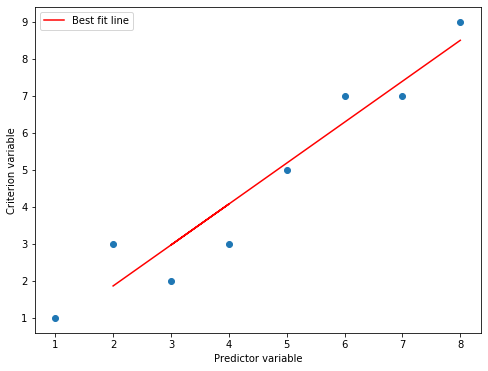

In [6]:
import matplotlib.pyplot as plt
x = [row[0] for row in train]
y = [row[1] for row in train]
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(test,predicted,color = 'red',label = 'Best fit line')
plt.xlabel("Predictor variable")
plt.ylabel("Criterion variable")
plt.legend()
plt.show()